# Toy gaussian example auto example

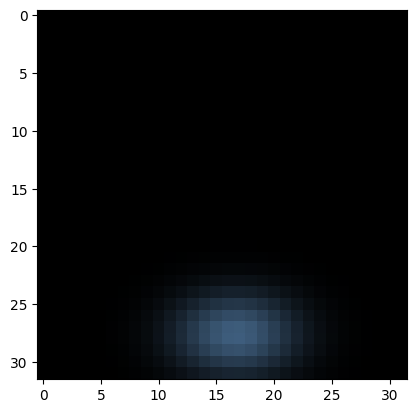

100%|██████████| 50/50 [03:07<00:00,  3.75s/it, loss=0.00792]

GT image


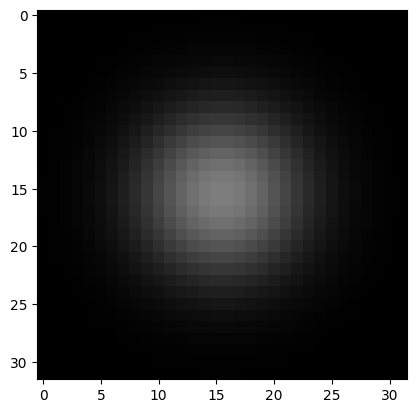

Final image


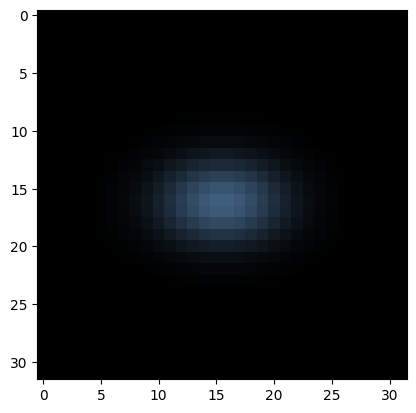

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
from PIL import Image

from splat.custom_pytorch_implementation.create_image_auto import (
    Camera,
    Gaussian,
    create_image_covariance_test_auto,
    create_image_full_auto,
)

torch.autograd.set_detect_anomaly(True)

point_3d = torch.tensor([[0.101, 0.1001, -4]], dtype=torch.float64).requires_grad_(True)
# point_3d = torch.tensor([[14, 14, 1]], dtype=torch.float64).requires_grad_(True)
r = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s = torch.tensor([[.1, .15, .2]], dtype=torch.float64).requires_grad_(True)
color = torch.tensor([0.4, 0.6, 0.8], dtype=torch.float64).requires_grad_(True)
opacity = torch.tensor([0.5], dtype=torch.float64).requires_grad_(True)

gaussian = Gaussian(
    mean_3d=point_3d, 
    r=r, 
    s=s, 
    color=color, 
    opacity=opacity
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

output_auto = create_image_full_auto(camera, gaussian, height, width)
plt.imshow(output_auto.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r, s, point_3d, color, opacity], lr=0.00005)

pbar = tqdm.tqdm(range(50))
for i in pbar:
    optimizer.zero_grad()
    output_auto = create_image_full_auto(camera, gaussian, height, width)
    # output_auto = create_image_covariance_test_auto(camera, gaussian, height, width)
    loss = (output_auto - gt_image).pow(2).mean()
    loss.backward()
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    # print("loss", loss)
    # print("point_3d", point_3d.grad)
    # print("R grad", r.grad)
    # print("S grad", s.grad)
    # print("Color grad", color.grad)
    # print("Opacity grad", opacity.grad)
    # print("\n\n")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_auto.detach().numpy())
plt.show()

# Toy Gaussian custom grad example

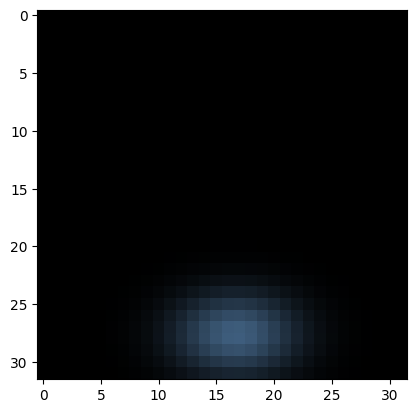

100%|██████████| 200/200 [03:54<00:00,  1.17s/it, loss=0.00674]

GT image


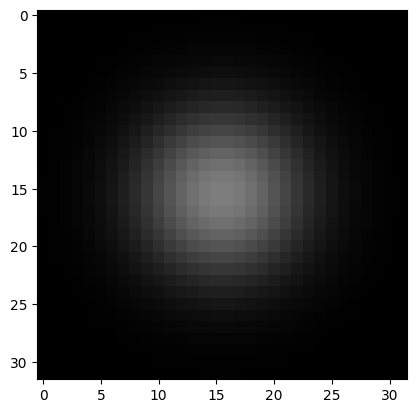

Final image


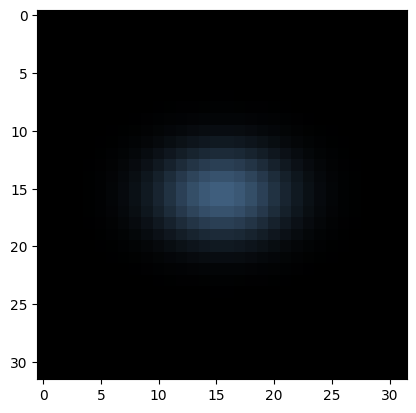

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
from PIL import Image

from splat.custom_pytorch_implementation.create_image_custom import (
    Camera,
    Gaussian,
    create_image_covariance_test_custom,
    create_image_full_custom,
)

torch.autograd.set_detect_anomaly(True)

point_3d = torch.tensor([[0.101, 0.1001, -4]], dtype=torch.float64).requires_grad_(True)
# point_3d = torch.tensor([[14, 14, 1]], dtype=torch.float64).requires_grad_(True)
r = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s = torch.tensor([[.1, .15, .2]], dtype=torch.float64).requires_grad_(True)
color = torch.tensor([0.4, 0.6, 0.8], dtype=torch.float64).requires_grad_(True)
opacity = torch.tensor([0.5], dtype=torch.float64).requires_grad_(True)

gaussian = Gaussian(
    mean_3d=point_3d, 
    r=r, 
    s=s, 
    color=color, 
    opacity=opacity
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

output_custom = create_image_full_custom(camera, gaussian, height, width)
plt.imshow(output_custom.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r, s, point_3d, color, opacity], lr=0.00005)

pbar = tqdm.tqdm(range(200))
for i in pbar:
    optimizer.zero_grad()
    output_custom = create_image_full_custom(camera, gaussian, height, width)
    # output_custom = create_image_covariance_test_custom(camera, gaussian, height, width)
    loss = (output_custom - gt_image).pow(2).mean()
    loss.backward()
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    # print("loss", loss)
    # print("point_3d", point_3d.grad)
    # print("R grad", r.grad)
    # print("S grad", s.grad)
    # print("Color grad", color.grad)
    # print("Opacity grad", opacity.grad)
    # print("\n\n")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_custom.detach().numpy())
plt.show()